# Simple Linear Regression : Salary Hike.

## Business problem:

To build a simple Linear Regression Model to predict the Salary Hike and select the best model using Python.

In [1]:
#Importing the required libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Importing the dataset:

In [2]:
df = pd.read_csv("C:/Users/DELL/Desktop/ExcelR DS Assignments/Assignment 4 - Simple Linear Regression/Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Checking Datatype:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Checking for null values:

In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
df[df.duplicated()].shape

(0, 2)

In [7]:
df[df.duplicated()]

,YearsExperience,Salary


### Plotting the data:

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

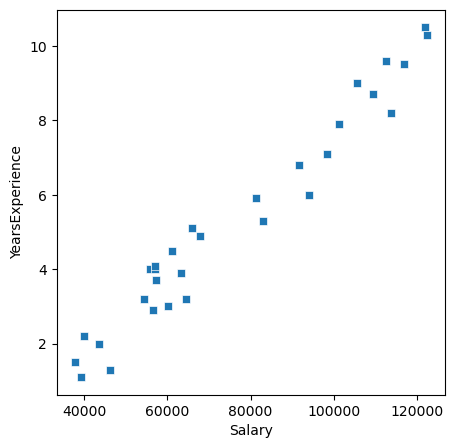

In [8]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Salary', y ='YearsExperience', data = df, palette ='set1', marker=',')

### Correlation:

In [9]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

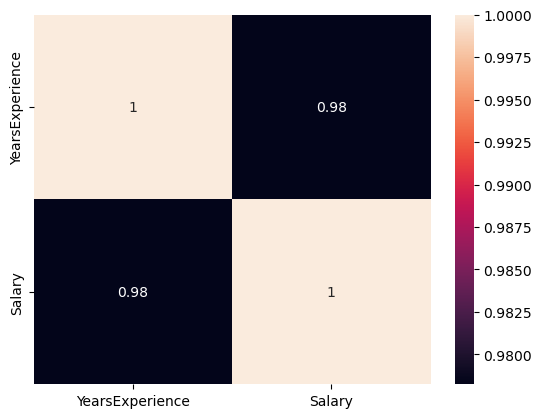

In [10]:
sns.heatmap(df.corr(),annot=True)

### Feature Engineering:

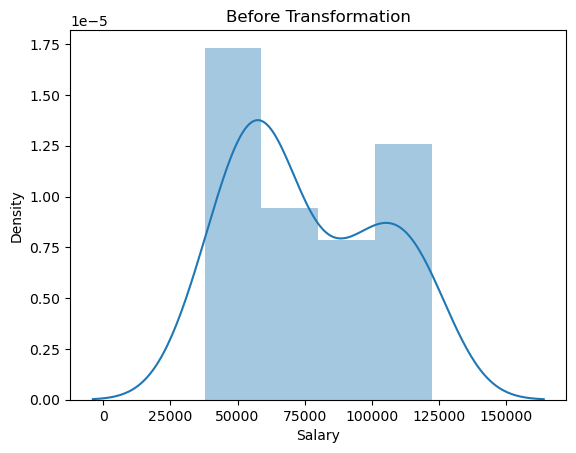

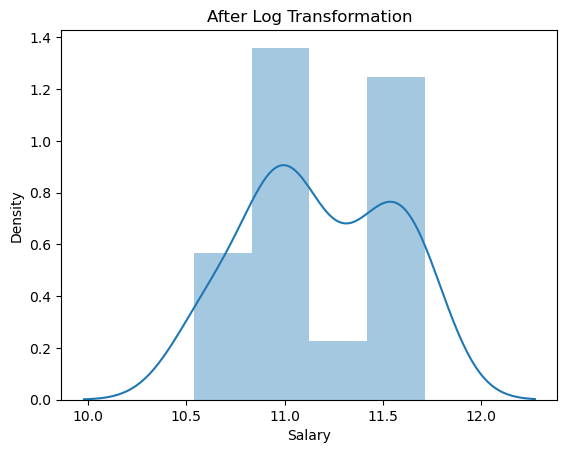

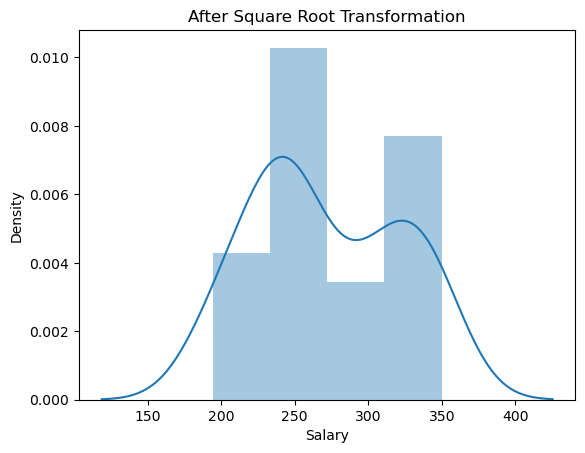

In [11]:
#Distplot for Salary Column:

sns.distplot(df['Salary'])
plt.title('Before Transformation')
plt.show()

sns.distplot(np.log(df['Salary']))
plt.title('After Log Transformation')
plt.show()

sns.distplot(np.sqrt(df['Salary']))
plt.title('After Square Root Transformation')
plt.show()

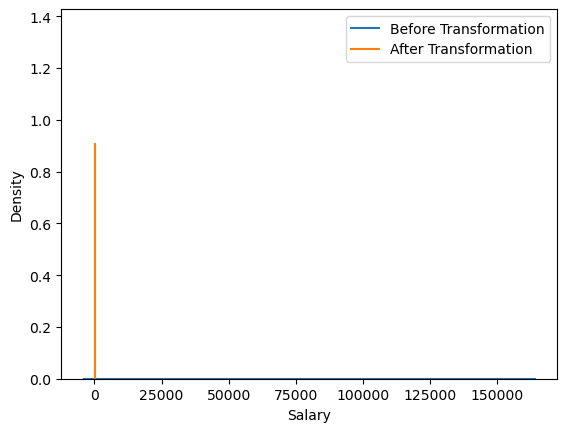

In [12]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Salary'])
sns.distplot(np.log(df['Salary']))
plt.legend(labels)
plt.show()

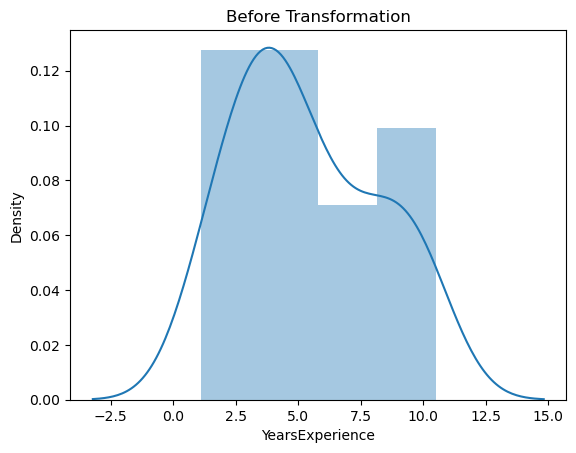

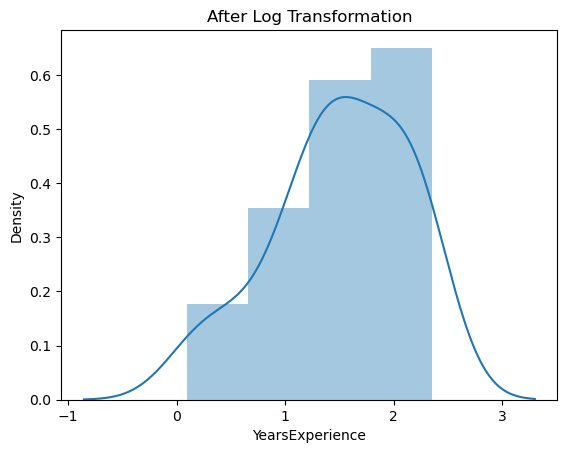

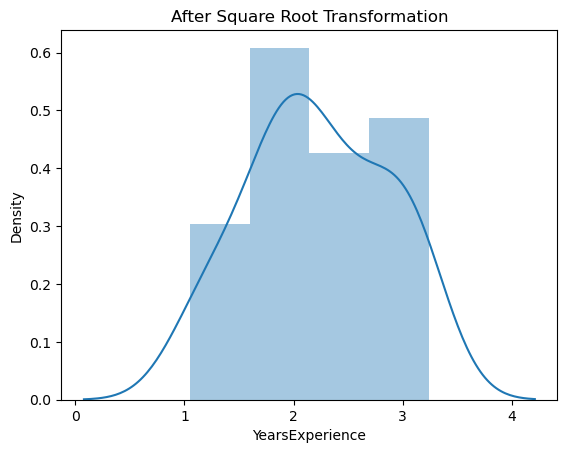

In [13]:
#Distplot for YearsExperience Column:

sns.distplot(df['YearsExperience'])
plt.title('Before Transformation')
plt.show()

sns.distplot(np.log(df['YearsExperience']))
plt.title('After Log Transformation')
plt.show()

sns.distplot(np.sqrt(df['YearsExperience']))
plt.title('After Square Root Transformation')
plt.show()

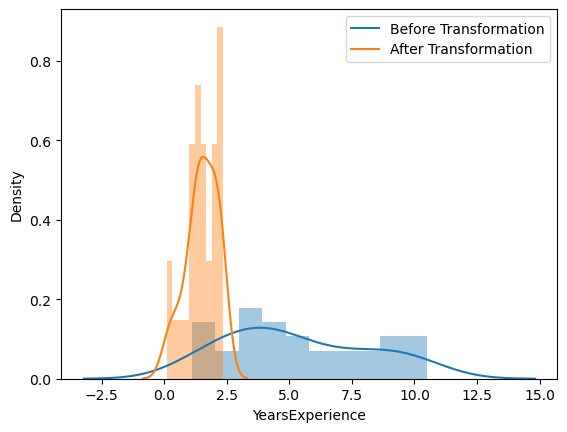

In [14]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['YearsExperience'],bins=10)
sns.distplot(np.log(df['YearsExperience']),bins=10)
plt.legend(labels)
plt.show()

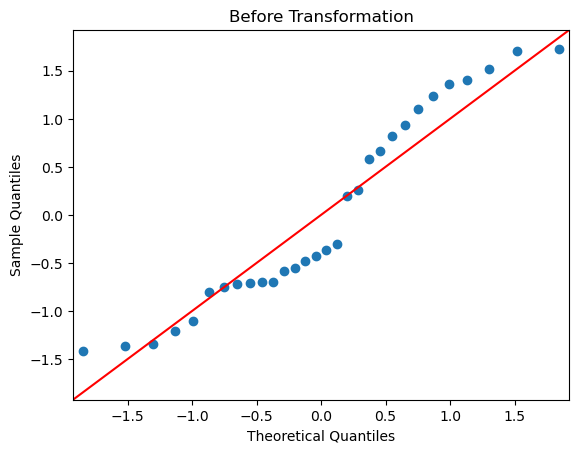

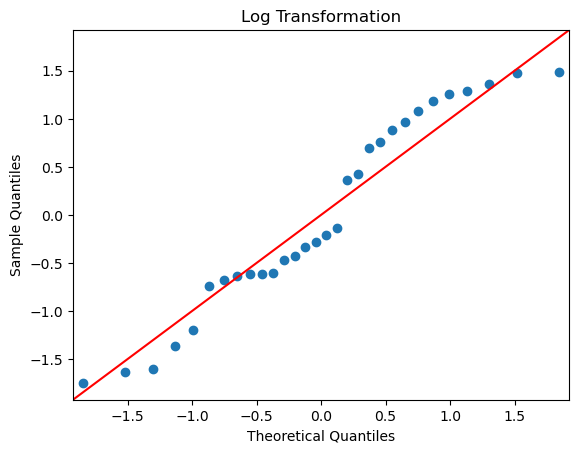

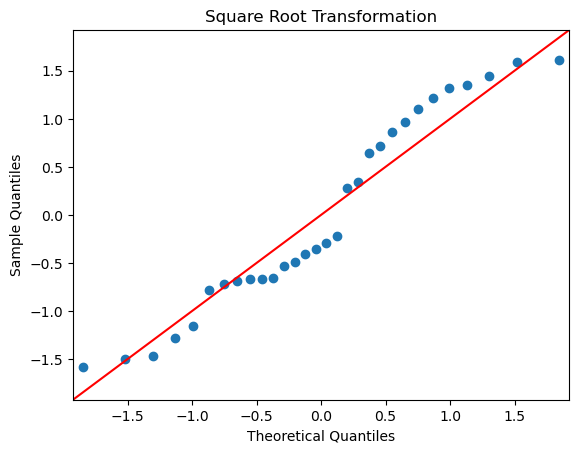

In [15]:
#QQ Plot for Salary Column:

sm.qqplot(df['Salary'], fit=True, line = '45')
plt.title('Before Transformation')
plt.show()

sm.qqplot(np.log(df['Salary']), fit=True, line='45')
plt.title('Log Transformation')
plt.show()

sm.qqplot(np.sqrt(df['Salary']), fit=True, line='45')
plt.title('Square Root Transformation')
plt.show()

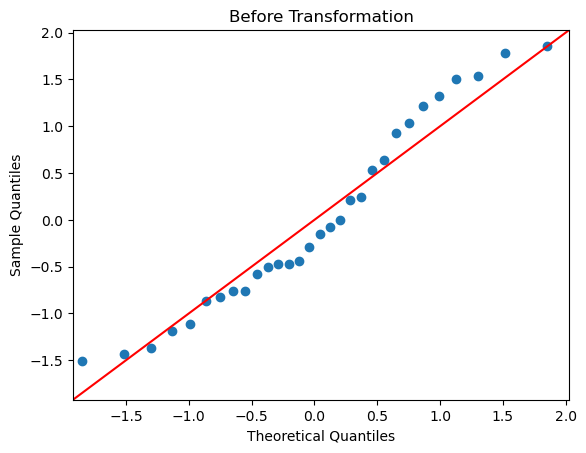

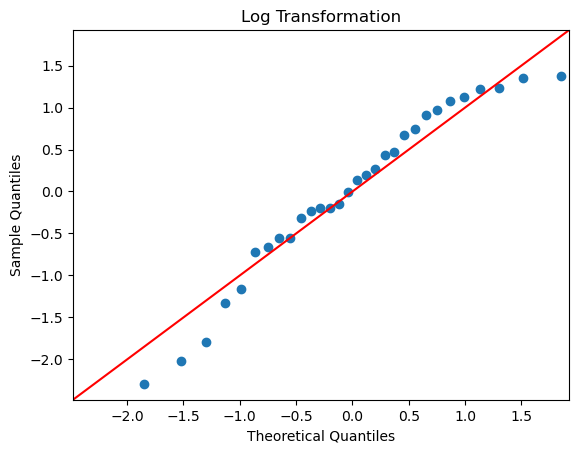

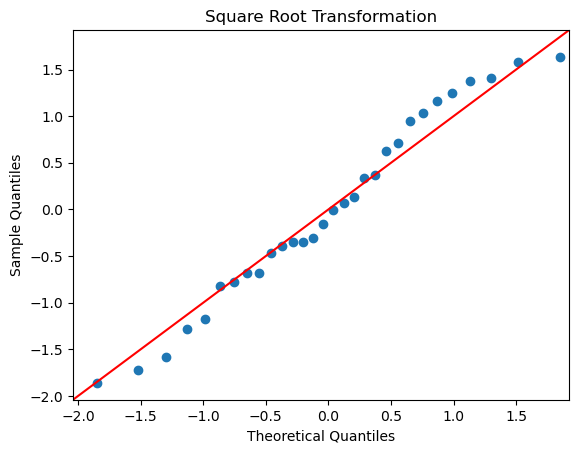

In [16]:
#QQ Plot for YearsExperience Column:

sm.qqplot(df['YearsExperience'], fit=True, line = '45')
plt.title('Before Transformation')
plt.show()

sm.qqplot(np.log(df['YearsExperience']), fit=True, line='45')
plt.title('Log Transformation')
plt.show()

sm.qqplot(np.sqrt(df['YearsExperience']), fit=True, line='45')
plt.title('Square Root Transformation')
plt.show()

### Fitting a Linear Regression Model:

#### Using Ordinary Least Squares (OLS) Regression:

In [17]:
#OLS = Ordinary Least Squares

model = smf.ols("Salary~YearsExperience", data= df).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

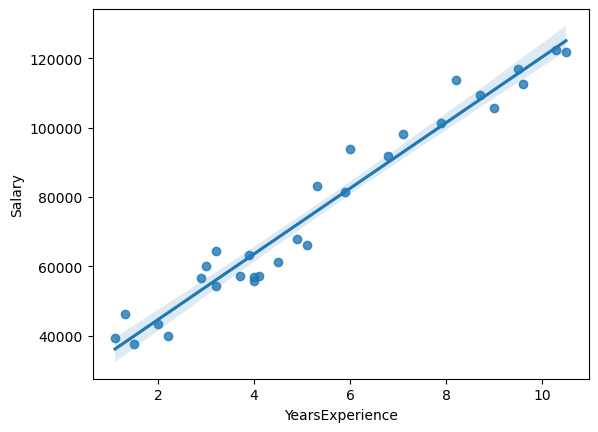

In [18]:
#To see the best fit line (which is as close as possible to as many points as possible)

sns.regplot(x='YearsExperience',y='Salary',data=df)

**From this plot, we can see that:**

1. There is good correlation between the two variables.
2. The score is equal to 0.98 and is a better score.

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           1.14e-20
Time:                        03:55:40   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see that,

The **R-Squared** and **adjusted R-Squared** scores are **0.957** and **0.955** respectively.  

### Square Root Transformation on Data:

In [20]:
model1 = smf.ols("np.sqrt(Salary)~np.sqrt(YearsExperience)", data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           7.58e-19
Time:                        03:55:40   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As we can see that,**

The R-squared and Adjusted R-squared scores are 0.942 and 0.940 respectively.

Hence, we will try some other transformation to get a higher score.

### Logarithmic Transformation on Data:

In [21]:
model2 = smf.ols("np.log(Salary)~np.log(YearsExperience)", data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           7.40e-16
Time:                        03:55:40   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As we can notice in the above model,**

The R-squared and Adjusted R-squared scores are 0.905 and 0.902 respectively.

### Cube-root Transformation:

In [22]:
model3 = smf.ols("np.cbrt(Salary)~np.log(YearsExperience)", data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     229.8
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           5.01e-15
Time:                        03:55:40   Log-Likelihood:                -57.711
No. Observations:                  30   AIC:                             119.4
Df Residuals:                      28   BIC:                             122.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  30.1224      0.829     36.333      0.000      28.424      31.821
np.log(YearsExperience)     7.7328      0.510     15.159      0.000       6.688       8.778
==============================================================================
Omnibus:                        0.297   Durbin-Watson:                   0.777
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.479
Skew:                           0.099   Prob(JB):                        0.787
Kurtosis:                       2.413   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see that, the **R-Squared** and **adjusted R-Squared** values for this model are **0.891** and **0.888** respectively.

The R-squared and Adjusted R-squared scores are **Highest** for the **model on which we didn't do any transformation**. Hence, we consider **this model** as a **good model for prediction**.

## Calculating the coefficients:

**We know that:**   
   
   ## Y = Beta 0 + (Beta 1 * X1) + e
  

### Calculating the Model Predictions:

In [23]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

#### B0 = 25792.200199 (Intercept)
#### B1 = 9449.962321 (Slope)
#### X1 = Independent data point
#### e (error) = Vertical distance between the actual 'Salary' value & the 'Salary' fitted value

In [24]:
print(model.tvalues, '\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


For Beta 0 (Intercept) : t-value = 11.346940 , p-value = 5.511950e-12

For Beta1 (YearsExperience) : t-value = 24.950094, p-value = 1.143068e-20

Null Hypothesis - The Independent variable is not at all significantly related to the dependent values.

Alternate Hypothesis - The Independent variable is significantly related to the dependent variable.

For any variable, if p-value < 0.05, then we can consider that variable to be useful/significant to predict the dependent variable.

Here, the independent variable YearsExperience is useful/significant to predict the dependent variable Salary.

In [25]:
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

That means **95.69%** of **variation** in the **dependent variable** is **explained by** the given **independent variable**.

## Test for Normality of Residuals (Q-Q Plot)

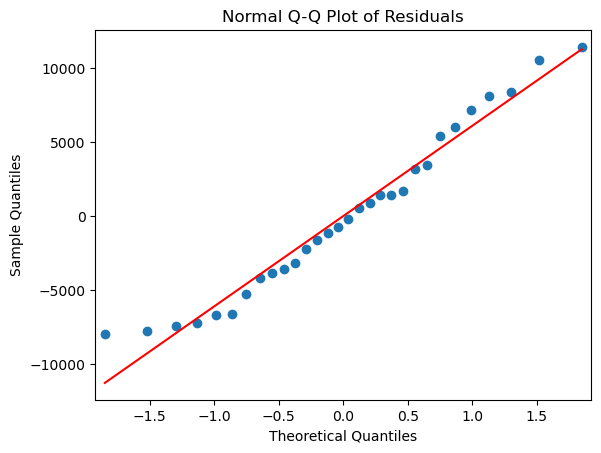

In [26]:
#For the model without any transformation:

qqplot=sm.qqplot(model.resid,line='r') # line=45 to draw the diagonal line
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

## Residual Plot For Homoscedasticity

In [27]:
def get_standardised_values(vals):
    return (vals-vals.mean())/vals.std()

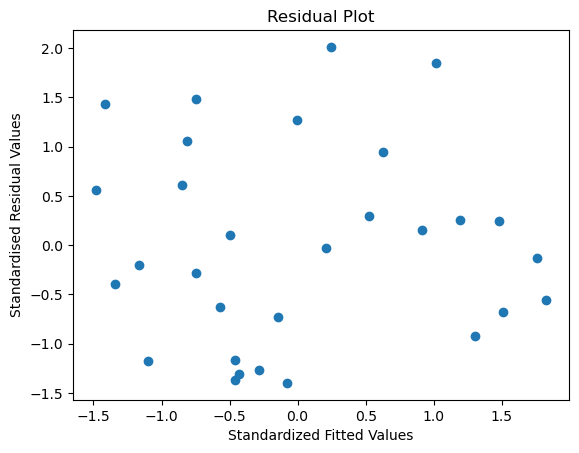

In [28]:
plt.scatter(get_standardised_values(model.fittedvalues),get_standardised_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardised Residual Values')
plt.show()

### Model Validation:

We will analyze **Mean Squared Error**(**MSE**) or **Root Mean Squared Error**(**RMSE**).

#### For model without any transformation:

In [29]:
df_wt = df.copy()

df_wt['Error']= model.resid
df_wt['Error_squared'] = (model.resid)**2
MSE_wt = df_wt['Error_squared'].mean()
RMSE_wt = np.sqrt(MSE_wt)

print("MSE for the model without transformation is:", MSE_wt)
print("RMSE for the model without transformation is:", RMSE_wt)

MSE for the model without transformation is: 31270951.722280964
RMSE for the model without transformation is: 5592.043608760661


Model has Root Mean Squared Error Value = 5592.043608760661. 

### Predicting values from model with No Transformation:

In [30]:
df_new = pd.DataFrame()
df_new['YearsExperience']= df['YearsExperience']
df_new['Salary']=df['Salary']
df_new['Predicted_Salary'] =model.predict(df_new['YearsExperience'])
df_new

,YearsExperience,Salary,Predicted_Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


### Plotting Actual Values Vs Predicted Values with Regression Line:

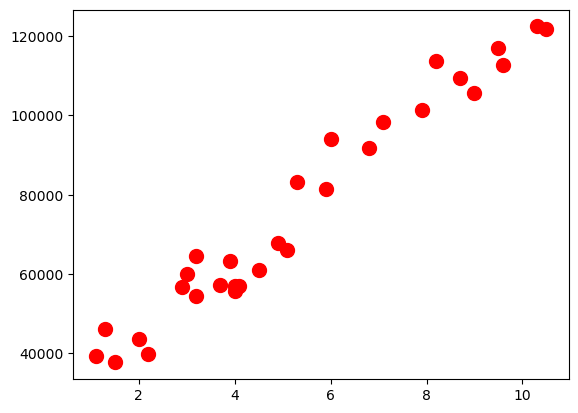

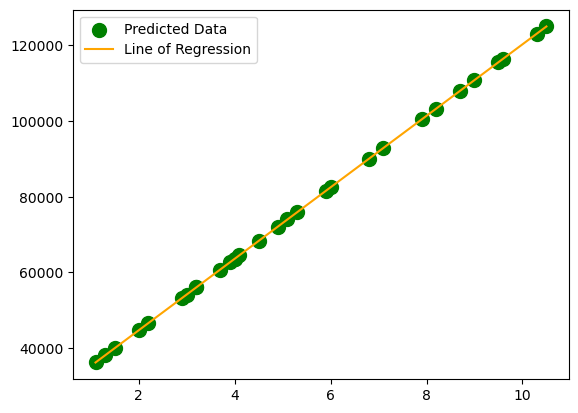

In [31]:
plt.scatter(df_new['YearsExperience'],df_new['Salary'], color='red', s=100, label='Actual Data')
plt.show()
plt.scatter(df_new['YearsExperience'],model.predict(df_new['YearsExperience']), color='green', s=100, label='Predicted Data')
plt.plot(df_new['YearsExperience'],model.predict(df_new['YearsExperience']), color='orange', label='Line of Regression')
plt.legend()
plt.show()

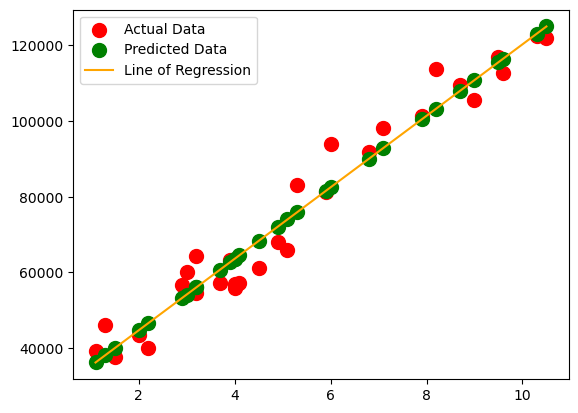

In [32]:
plt.scatter(df_new['YearsExperience'],df_new['Salary'], color='red', s=100, label='Actual Data')
plt.scatter(df_new['YearsExperience'],model.predict(df_new['YearsExperience']), color='green', s=100, label='Predicted Data')
plt.plot(df_new['YearsExperience'],model.predict(df_new['YearsExperience']), color='orange', label='Line of Regression')
plt.legend()
plt.show()